In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, LassoCV, RidgeCV, Lasso, LogisticRegressionCV
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV

from sklearn.metrics import roc_auc_score, mean_squared_error, roc_curve, RocCurveDisplay, auc

from matplotlib import pyplot as plt

In [2]:
!ls

Machine Learning Analysis.ipynb Report - Significance tests.pdf
README.md                       Significance tests.ipynb
Report - ML Analysis.pdf        data


In [3]:
data = pd.read_csv('./data/movieReplicationSet.csv')
data.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
movie_ratings = data.iloc[:,:400]

In [5]:
movie_ratings.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN


In [6]:
a = np.asarray([2,1,3])
b = np.asarray([7,8,9])
# (~a.isna())*(~b.isna())

b[np.argsort(a)]

array([8, 7, 9])

# Question 1

In [7]:
# For data imputation:
avg_rating_of_user = np.mean(movie_ratings, axis = 1)
avg_rating_of_movie = np.mean(movie_ratings, axis = 0)

num_users = avg_rating_of_user.shape[0]
num_movies = avg_rating_of_movie.shape[0]

movie_avg = (np.ones((num_users,num_movies))*np.reshape(np.asarray(avg_rating_of_movie), (1,num_movies)))

user_avg = (np.ones((num_users,num_movies))*np.reshape(np.asarray(avg_rating_of_user), (num_users,1)))

# print((movie_avg == user_avg).sum())

imputation_replacement = (movie_avg + user_avg)/2
imputation_replacement.shape

(1097, 400)

In [8]:
movie_ratings

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [9]:
invalid_vals = movie_ratings.isna()
invalid_vals

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,True,True,False,True,False,True,True,True,True,True,...,True,True,True,False,False,True,True,True,True,True
1,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
3,True,True,False,True,False,True,True,True,True,False,...,True,False,True,True,False,True,True,True,True,True
4,True,True,False,True,False,True,False,False,True,False,...,False,True,False,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
1093,False,False,True,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1094,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,False,True,True,True,True,True
1095,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True


In [10]:
for i in range(1097):
    for j in range(400):
        if invalid_vals.iloc[i][j]:
            movie_ratings.iloc[i][j] = imputation_replacement[i][j]

movie_ratings.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456


In [11]:
# Linear Regression models per movie
movie_list = list(movie_ratings.keys())

scores = {}

for movie_to_predict in movie_list:
    
    scores[movie_to_predict] = {}
    
    target = movie_ratings[movie_to_predict]
        
    for movie_as_input_index in range(len(movie_list)):
        
        movie_as_input = movie_list[movie_as_input_index]
        
        if movie_as_input == movie_to_predict:
            continue
        
        inp = movie_ratings[movie_as_input]

        valid = ~target.isna()
        
#         nan_indexes = inp.isna()
#         for index in range(inp.shape[0]):
#             if nan_indexes[index]:
#                 inp[index] = imputation_replacement[index][movie_as_input_index]
        
        inp = np.reshape(np.asarray(inp[valid]), (-1,1))
        y_true = np.reshape(np.asarray(target[valid]), (-1,1))
                
        model = LinearRegression().fit(inp,y_true)
        r2 = model.score(inp,y_true)
        scores[movie_to_predict][movie_as_input] = r2
        print(movie_list.index(movie_to_predict), end = '\r')
#         print("\nFor predicting {} using {}, the R2 value is:\n{}\n\n\n".format(movie_to_predict, movie_as_input, r2))


In [12]:
# best input-target movie pairs and avg of the 400

best_r2_scores = []

target_input_r2 = []

for target_movie in scores:
    predictor_movies = [i for i  in scores[target_movie]]
    r2_scores = [scores[target_movie][i] for i in predictor_movies]
    best_r2_index = np.argmax(r2_scores)
    target_input_r2.append([target_movie, predictor_movies[best_r2_index], r2_scores[best_r2_index]])
    print("For predicting {}, the best predictor is {} and the R2 is {}".format(target_movie, predictor_movies[best_r2_index], r2_scores[best_r2_index]))
    best_r2_scores.append(r2_scores[best_r2_index])
    

For predicting The Life of David Gale (2003), the best predictor is The King of Marvin Gardens (1972) and the R2 is 0.5675329673680642
For predicting Wing Commander (1999), the best predictor is From Hell (2001) and the R2 is 0.5606275642181675
For predicting Django Unchained (2012), the best predictor is The Life of David Gale (2003) and the R2 is 0.23233530678010383
For predicting Alien (1979), the best predictor is Aliens (1986) and the R2 is 0.3295479364117798
For predicting Indiana Jones and the Last Crusade (1989), the best predictor is Indiana Jones and the Temple of Doom (1984) and the R2 is 0.3744782737500618
For predicting Snatch (2000), the best predictor is Slackers (2002) and the R2 is 0.45983684517772305
For predicting Rambo: First Blood Part II (1985), the best predictor is Pieces of April (2003) and the R2 is 0.28911668225139164
For predicting Fargo (1996), the best predictor is Brazil (1985) and the R2 is 0.2867279829015901
For predicting Let the Right One In (2008), t

In [13]:
print('Average COD of best LR models for each of the 400 movies is: ', np.mean(best_r2_scores))

Average COD of best LR models for each of the 400 movies is:  0.42378171067196035


(array([ 2.,  3., 10., 15., 32., 26., 23., 17., 23., 30., 22., 39., 27.,
        24., 25., 21., 30., 14.,  8.,  9.]),
 array([0.07948469, 0.11208583, 0.14468697, 0.17728811, 0.20988925,
        0.24249039, 0.27509153, 0.30769267, 0.34029381, 0.37289494,
        0.40549608, 0.43809722, 0.47069836, 0.5032995 , 0.53590064,
        0.56850178, 0.60110292, 0.63370406, 0.6663052 , 0.69890634,
        0.73150748]),
 <BarContainer object of 20 artists>)

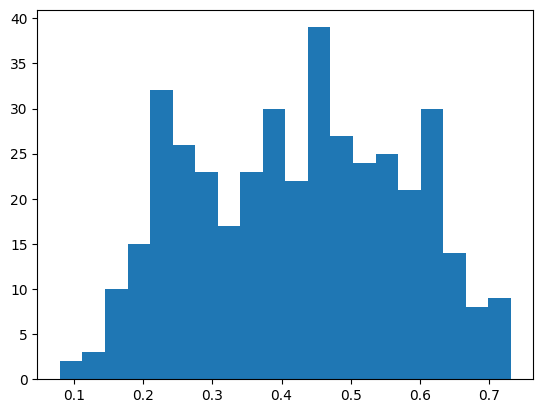

In [14]:
plt.hist(best_r2_scores, bins = 20)

In [15]:
target_input_r2 = pd.DataFrame(target_input_r2)
target_input_r2.columns = ['Target','Predictor', 'R2 Value']
# target_input_r2
sorted_by_r2 = target_input_r2.iloc[np.argsort(target_input_r2['R2 Value'])]
easiest_to_predict = sorted_by_r2.iloc[-10:]
hardest_to_predict = sorted_by_r2.iloc[:10]

In [16]:
easiest_to_predict

,Target,Predictor,R2 Value
309,Heavy Traffic (1973),Ran (1985),0.692734
334,The Final Conflict (1981),The Lookout (2007),0.700188
282,Congo (1995),The Straight Story (1999),0.700569
287,The Straight Story (1999),Congo (1995),0.700569
240,The Bandit (1996),Best Laid Plans (1999),0.711222
249,Best Laid Plans (1999),The Bandit (1996),0.711222
395,Patton (1970),The Lookout (2007),0.713554
377,The Lookout (2007),Patton (1970),0.713554
208,I.Q. (1994),Erik the Viking (1989),0.731507
203,Erik the Viking (1989),I.Q. (1994),0.731507


In [17]:
hardest_to_predict

,Target,Predictor,R2 Value
80,Avatar (2009),Bad Boys (1995),0.079485
95,Interstellar (2014),Torque (2004),0.111343
9,Black Swan (2010),Sorority Boys (2002),0.117080
55,Clueless (1995),Escape from LA (1996),0.141426
190,The Cabin in the Woods (2012),The Evil Dead (1981),0.143887
319,La La Land (2016),The Lookout (2007),0.148514
292,Titanic (1997),Cocktail (1988),0.154136
41,13 Going on 30 (2004),Can't Hardly Wait (1998),0.160164
14,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003),0.168991
248,Grown Ups 2 (2013),The Core (2003),0.171119


# Question 2

In [18]:
data.shape

(1097, 477)

In [19]:
data.iloc[:,474:477]

,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,1.0,0,1
1,1.0,0,0
2,1.0,1,0
3,1.0,0,1
4,1.0,1,1
...,...,...,...
1092,1.0,0,0
1093,1.0,0,0
1094,1.0,0,0
1095,1.0,0,1


In [20]:
data.iloc[:,474:477].isna().sum()

Gender identity (1 = female; 2 = male; 3 = self-described)            24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)            0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)     0
dtype: int64

In [21]:
gender, only, solo = data.keys()[474:477]
gender

'Gender identity (1 = female; 2 = male; 3 = self-described)'

In [22]:
for i in hardest_to_predict.iloc:
    print(i)

Target         Avatar (2009)
Predictor    Bad Boys (1995)
R2 Value            0.079485
Name: 80, dtype: object
Target       Interstellar (2014)
Predictor          Torque (2004)
R2 Value                0.111343
Name: 95, dtype: object
Target          Black Swan (2010)
Predictor    Sorority Boys (2002)
R2 Value                  0.11708
Name: 9, dtype: object
Target             Clueless (1995)
Predictor    Escape from LA (1996)
R2 Value                  0.141426
Name: 55, dtype: object
Target       The Cabin in the Woods (2012)
Predictor             The Evil Dead (1981)
R2 Value                          0.143887
Name: 190, dtype: object
Target        La La Land (2016)
Predictor    The Lookout (2007)
R2 Value               0.148514
Name: 319, dtype: object
Target        Titanic (1997)
Predictor    Cocktail (1988)
R2 Value            0.154136
Name: 292, dtype: object
Target          13 Going on 30 (2004)
Predictor    Can't Hardly Wait (1998)
R2 Value                     0.160164
Name: 41, d

In [23]:
from scipy import stats as st

st.mode(data[gender])

/var/folders/jq/tjhgv6nd5cv165gc1bvctnlr0000gn/T/ipykernel_31669/894228822.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(data[gender])


ModeResult(mode=array([1.]), count=array([807]))

In [24]:
# float(gender_mode.mode)

In [25]:
# Multiple regression models for hardest to predict movies:

gender, only, solo = data.keys()[474:477]

gender_mode = st.mode(data[gender])
data[gender][data[gender].isna()] = float(gender_mode.mode)

delta_r2 = []

for target_input_r2 in hardest_to_predict.iloc:
    
    target,best_predictor,old_r2 = target_input_r2
    
    input_data_subset = pd.DataFrame()
    input_data_subset['input_movie'] = movie_ratings[best_predictor]
    input_data_subset['gender_identity'] = data[gender]
    input_data_subset['only_child'] = data[only]
    input_data_subset['solo_watcher'] = data[solo]
    
#     print(input_data_subset.isna().sum())
    
    target_ratings = movie_ratings[target]
    
#     inp = np.reshape(np.asarray(inp[valid]), (-1,1))
#     y_true = np.reshape(np.asarray(target[valid]), (-1,1))
    
    valid = ~target_ratings.isna()
    model = LinearRegression().fit(input_data_subset[valid],target_ratings[valid])
    new_r2 = model.score(input_data_subset[valid],target_ratings[valid])
    
    print("R2 value for {} has changed from {} to {}\n\n".format(target,old_r2,new_r2))
    
    delta_r2.append([target,best_predictor, old_r2, new_r2])
    

R2 value for Avatar (2009) has changed from 0.07948469093084642 to 0.08186559634007473


R2 value for Interstellar (2014) has changed from 0.11134259626426413 to 0.11693697265119585


R2 value for Black Swan (2010) has changed from 0.11708033979272658 to 0.1181518381107568


R2 value for Clueless (1995) has changed from 0.141426437225317 to 0.14775265908493052


R2 value for The Cabin in the Woods (2012) has changed from 0.1438868695548512 to 0.15219713373282917


R2 value for La La Land (2016) has changed from 0.14851372649350136 to 0.15123886972535872


R2 value for Titanic (1997) has changed from 0.15413567330482125 to 0.15828455851767265


R2 value for 13 Going on 30 (2004) has changed from 0.16016372820860814 to 0.16596229987675404


R2 value for The Fast and the Furious (2001) has changed from 0.1689914228239079 to 0.17318140196519605


R2 value for Grown Ups 2 (2013) has changed from 0.17111918539600857 to 0.17960271996808153




/var/folders/jq/tjhgv6nd5cv165gc1bvctnlr0000gn/T/ipykernel_31669/2408160490.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  gender_mode = st.mode(data[gender])
/var/folders/jq/tjhgv6nd5cv165gc1bvctnlr0000gn/T/ipykernel_31669/2408160490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[gender][data[gender].isna()] = float(gender_mode.mode)


In [26]:
# Multiple regression models for easiest to predict movies:

# delta_r2 = []
# delta_r2 will have the first 10 entries for hardest to predict and next 10 for easiest to predict

for target_input_r2 in easiest_to_predict.iloc:
    
    target,best_predictor,old_r2 = target_input_r2
    
    input_data_subset = pd.DataFrame()
    input_data_subset['input_movie'] = movie_ratings[best_predictor]
    input_data_subset['gender_identity'] = data[gender]
    input_data_subset['only_child'] = data[only]
    input_data_subset['solo_watcher'] = data[solo]
    
#     print(input_data_subset.isna().sum())
    
    target_ratings = movie_ratings[target]
    
#     inp = np.reshape(np.asarray(inp[valid]), (-1,1))
#     y_true = np.reshape(np.asarray(target[valid]), (-1,1))
    
    valid = ~target_ratings.isna()
    model = LinearRegression().fit(input_data_subset[valid],target_ratings[valid])
    new_r2 = model.score(input_data_subset[valid],target_ratings[valid])
    
    print("R2 value for {} has changed from {} to {}\n\n".format(target,old_r2,new_r2))
    
    delta_r2.append([target,best_predictor, old_r2, new_r2])
    

R2 value for Heavy Traffic (1973) has changed from 0.6927335239652475 to 0.6931365364694149


R2 value for The Final Conflict (1981) has changed from 0.7001881161214467 to 0.7019750525447275


R2 value for Congo (1995) has changed from 0.7005689836445022 to 0.7006340535957715


R2 value for The Straight Story (1999) has changed from 0.7005689836445022 to 0.7012808128458178


R2 value for The Bandit (1996) has changed from 0.7112222468014324 to 0.7123737481063839


R2 value for Best Laid Plans (1999) has changed from 0.7112222468014324 to 0.7124746929418735


R2 value for Patton (1970) has changed from 0.7135542589926913 to 0.7146453250986333


R2 value for The Lookout (2007) has changed from 0.7135542589926913 to 0.7149310779577762


R2 value for I.Q. (1994) has changed from 0.731507476731657 to 0.7319200428707223


R2 value for Erik the Viking (1989) has changed from 0.731507476731657 to 0.7326259001468333




In [27]:
delta_r2

[['Avatar (2009)',
  'Bad Boys (1995)',
  0.07948469093084642,
  0.08186559634007473],
 ['Interstellar (2014)',
  'Torque (2004)',
  0.11134259626426413,
  0.11693697265119585],
 ['Black Swan (2010)',
  'Sorority Boys (2002)',
  0.11708033979272658,
  0.1181518381107568],
 ['Clueless (1995)',
  'Escape from LA (1996)',
  0.141426437225317,
  0.14775265908493052],
 ['The Cabin in the Woods (2012)',
  'The Evil Dead (1981)',
  0.1438868695548512,
  0.15219713373282917],
 ['La La Land (2016)',
  'The Lookout (2007)',
  0.14851372649350136,
  0.15123886972535872],
 ['Titanic (1997)',
  'Cocktail (1988)',
  0.15413567330482125,
  0.15828455851767265],
 ['13 Going on 30 (2004)',
  "Can't Hardly Wait (1998)",
  0.16016372820860814,
  0.16596229987675404],
 ['The Fast and the Furious (2001)',
  'Terminator 3: Rise of the Machines (2003)',
  0.1689914228239079,
  0.17318140196519605],
 ['Grown Ups 2 (2013)',
  'The Core (2003)',
  0.17111918539600857,
  0.17960271996808153],
 ['Heavy Traffic (1

Text(0, 0.5, 'New R2 values with extra attributes')

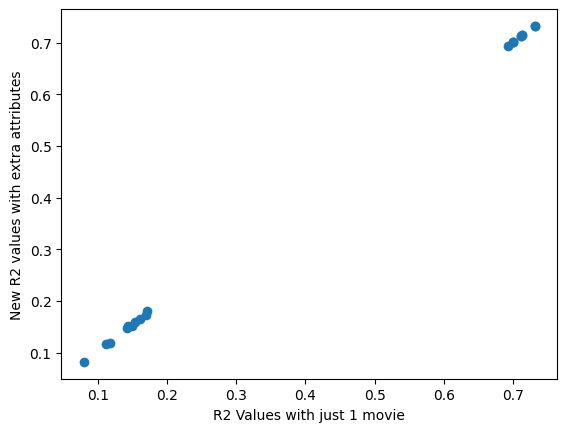

In [28]:
delta_r2 = np.asarray(delta_r2)
x = [float(i) for i in delta_r2[:,2]]
y = [float(i) for i in delta_r2[:,3]]
plt.scatter(x,y)
plt.xlabel('R2 Values with just 1 movie')
plt.ylabel('New R2 values with extra attributes')

Text(0.5, 1.0, 'Difference between old and new R2 values')

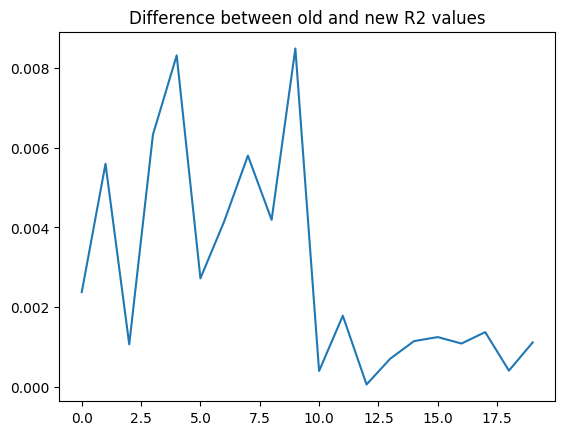

In [29]:
diff = [y[i] - x[i] for i in range(20)]
plt.plot(diff)
plt.title('Difference between old and new R2 values')

# Question 3

In [30]:
moderately_predictable = sorted_by_r2.iloc[184:215]
moderately_predictable

,Target,Predictor,R2 Value
327,Aliens (1986),Miller's Crossing (1990),0.409573
76,Gone in Sixty Seconds (2000),The 51st State (2001),0.411025
62,Crossroads (2002),Pieces of April (2003),0.412506
316,Austin Powers in Goldmember (2002),Austin Powers: The Spy Who Shagged Me (1999),0.414118
219,Austin Powers: The Spy Who Shagged Me (1999),Austin Powers in Goldmember (2002),0.414118
209,Goodfellas (1990),Patton (1970),0.416160
305,The Big Lebowski (1998),Escape from LA (1996),0.417674
397,Twister (1996),Sexy Beast (2000),0.418869
79,Blues Brothers 2000 (1998),The 51st State (2001),0.421678
145,Dances with Wolves (1990),The Deer Hunter (1978),0.423551


In [31]:
len(movie_list)

400

In [32]:
moderately_predictable_movies = np.asarray(moderately_predictable['Target'])
input_candidates = []
for i in movie_list:
    if i not in moderately_predictable_movies and i not in delta_r2[:,0]:
        input_candidates.append(i)
        
input_movies = np.random.choice(input_candidates, 10)
input_movies

array(['10 Things I Hate About You (1999)', 'Donnie Darko (2001)',
       'The Shawshank Redemption (1994)', 'The Station Agent (2003)',
       'Girl With a Pearl Earring (2003)',
       'Once Upon a Time in the West (1968)', 'Rocky (1976)',
       'Tarzan (1999)', 'My Big Fat Greek Wedding (2002)',
       'The Intouchables (2011)'], dtype='<U61')

In [33]:
input_movies.shape

(10,)

In [34]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [35]:
movie_ratings.iloc[896] = np.mean(movie_ratings,axis = 0)

In [ ]:
input_data_subset = movie_ratings[input_movies]

optimal_alphas = []
best_rmse_coefs = []
rmse_scores =[]

for i in range(30):
    target_ratings = movie_ratings[moderately_predictable_movies[i]]

    X_train, X_test, y_train, y_test = train_test_split(input_data_subset, target_ratings, test_size = 0.2, random_state = 42)

    model = RidgeCV(alphas = np.arange(1,400,1), cv = 10, scoring = 'neg_root_mean_squared_error').fit(X_train,y_train)
    test_rmse = mean_squared_error(model.predict(X_test), y_test,squared= False)
    rmse_scores.append(test_rmse)

    optimal_alphas.append(model.alpha_)
    
    best_rmse_coefs.append(model.coef_)


In [ ]:
optimal_alphas

In [ ]:
len(rmse_scores)

In [ ]:
for i in range(30):
    print("\nFor movie: ", moderately_predictable_movies[i],"\tRMSE value is ", rmse_scores[i])

# Question 4

In [ ]:
best_alpha_lasso = [] 
RMSE_values_lasso = []
lasso_weight = []
for i in range(len(middle_31_movies)):
    x_mid = df_movies_copy[k2]
    y_mid = df_movies_copy[middle_31_movies[i]]
    x_train,x_test,y_train,y_test=train_test_split(x_mid,y_mid,test_size=0.2,random_state =42)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    parameters = {'alpha':[2.0**c for c in np.arange(-50, 0)]}
    # define the model/ estimator
    model = Lasso()
    # define the grid search
    Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=cv)
    #fit the grid search
    Lasso_reg.fit(x_train,y_train)
    best_model_lasso = Lasso_reg.best_estimator_
    best_model_lasso.fit(x_train,y_train)
    #model = LassoCV(alphas=np.arange(0, 1, 0.001), cv=cv)
    #model.fit(x_train, y_train)
    best_alpha_lasso.append(best_model_lasso.alpha)
    RMSE = mean_squared_error(best_model_lasso.predict(x_test), y_test)
    RMSE_values_lasso.append(RMSE)
    lasso_weight.append(best_model_lasso.coef_)
    print('movie done')

In [ ]:
input_data_subset = movie_ratings[input_movies]

best_alpha_lasso = [] 
RMSE_values_lasso = []
lasso_weight = []

for i in range(30):
    target_ratings = movie_ratings[moderately_predictable_movies[i]]

    x_train, x_test, y_train, y_test = train_test_split(input_data_subset, target_ratings, test_size = 0.2, random_state = 42)

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    parameters = {'alpha':[2.0**c for c in np.arange(-50, 0)]}
    
    model = Lasso()
    
    Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=cv)
    
    Lasso_reg.fit(x_train,y_train)
    best_model_lasso = Lasso_reg.best_estimator_
    best_model_lasso.fit(x_train,y_train)
    
    best_alpha_lasso.append(best_model_lasso.alpha)
    RMSE = mean_squared_error(best_model_lasso.predict(x_test), y_test)
    RMSE_values_lasso.append(RMSE)
    lasso_weight.append(best_model_lasso.coef_)

In [ ]:
optimal_alphas

In [ ]:
for i in range(len(best_alpha_lasso)):
    print("For movie: ", moderately_predictable_movies[i])
    print("RMSE value is ", RMSE_values_lasso[i])
    print("Optimal Alpha value is ", best_alpha_lasso[i])
    print("Norm of the coefficients is ", np.linalg.norm(lasso_weight[i]),"\n\n\n")

In [ ]:
for i in range(len(best_alpha_lasso)):
    print("\nFor movie: ", moderately_predictable_movies[i],"\tRMSE value is ", RMSE_values_lasso[i])

## Question 5

In [ ]:
data

In [ ]:
avg_rating_of_user[896] = np.mean(avg_rating_of_user)
avg_rating_of_user.isna().sum()

In [ ]:
avg_rating_of_movie.isna().sum()

In [ ]:
sorted_order = np.argsort(avg_rating_of_movie)

target_movies = movie_ratings.keys()[sorted_order][198:202]

In [ ]:
target_movies

In [ ]:
r2_scores = []
auc_vals = []
for target_movie in target_movies:
#     print(target_movie)
    target_median = np.median(movie_ratings[target_movie])
    y_label = 1*(movie_ratings[target_movie] >= target_median)
    X_train, X_test, y_train, y_test = train_test_split(avg_rating_of_user, y_label, test_size = 0.2, random_state = 42)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    model = LogisticRegressionCV(cv = 10, random_state = 42).fit(np.reshape(np.asarray(X_train), (-1,1)), y_train)
    r2 = model.score(np.reshape(np.asarray(X_test), (-1,1)), y_test)
    r2_scores.append(r2)
    preds = model.predict(np.reshape(np.asarray(X_test), (-1,1)))
    auc_vals.append(roc_auc_score(y_test,preds))
    plt.figure()
    fpr1, tpr1, thresholds1 = roc_curve(y_test, preds)
    roc_auc1 = auc(fpr1, tpr1)
    display1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Fahrenheit 9/11 (2004)')
    display1.plot()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve for {}".format(target_movie))
    

In [ ]:
for i in range(4):
    print("For predicting movie {}, the AUC is {}".format(target_movies[i],auc_vals[i]))

# Extra Credit

In [ ]:
data.iloc[:,400:].isna().sum()

In [ ]:
# Multiple regression models for hardest to predict movies:

v1,v2,v3 = data.keys()[474:477]

gender_mode = st.mode(data[gender])
data[gender][data[gender].isna()] = float(gender_mode.mode)

delta_r2 = []

for target_input_r2 in hardest_to_predict.iloc:
    
    target,best_predictor,old_r2 = target_input_r2
    
    input_data_subset = pd.DataFrame()
    input_data_subset['input_movie'] = movie_ratings[best_predictor]
    input_data_subset['variable_1'] = data[v1]
    input_data_subset['variable_2'] = data[v2]
    input_data_subset['variable_3'] = data[v3]
    
#     print(input_data_subset.isna().sum())
    
    target_ratings = movie_ratings[target]
    
#     inp = np.reshape(np.asarray(inp[valid]), (-1,1))
#     y_true = np.reshape(np.asarray(target[valid]), (-1,1))
    
    valid = ~target_ratings.isna()
    model = LinearRegression().fit(input_data_subset[valid],target_ratings[valid])
    new_r2 = model.score(input_data_subset[valid],target_ratings[valid])
    
    print("R2 value for {} has changed from {} to {}\n\n".format(target,old_r2,new_r2))
    
    delta_r2.append([target,best_predictor, old_r2, new_r2])
    